In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

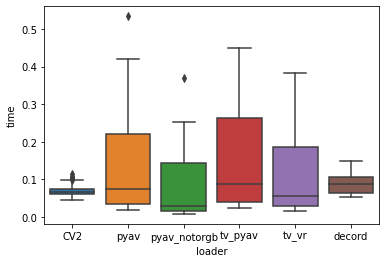

In [11]:
df = pd.read_csv("./basic_reading_speeds.csv")
ax = sns.boxplot(x="loader", y="time", data=df)

In [14]:
dfa = pd.read_csv("./basic_reading_speeds.csv")
dfb = pd.read_csv("./basic_reading_speeds_tv05.csv")
df = pd.concat([dfa, dfb])

In [15]:
df_ss = df[df.loader == "tv_vr"]
df_ss

,Unnamed: 0,loader,video,time,num_frames,tv
4,4,tv_vr,RATRACE_wave_f_nm_np1_fr_goo_37.avi,0.029240,72,0.8.0a0+0344603
10,10,tv_vr,TrumanShow_wave_f_nm_np1_fr_med_26.avi,0.015587,48,0.8.0a0+0344603
16,16,tv_vr,SOX5yA1l24A.mp4,0.168951,332,0.8.0a0+0344603
22,22,tv_vr,SchoolRulesHowTheyHelpUs_wave_f_nm_np1_ba_med_...,0.017178,74,0.8.0a0+0344603
28,28,tv_vr,WUzgd7C1pWA.mp4,0.193522,327,0.8.0a0+0344603
...,...,...,...,...,...,...
151,151,tv_vr,SchoolRulesHowTheyHelpUs_wave_f_nm_np1_ba_med_...,0.018133,74,0.5.0
153,153,tv_vr,WUzgd7C1pWA.mp4,0.205029,327,0.5.0
155,155,tv_vr,v_SoccerJuggling_g24_c01.avi,0.055257,251,0.5.0
157,157,tv_vr,R6llTwEh07w.mp4,0.196034,303,0.5.0


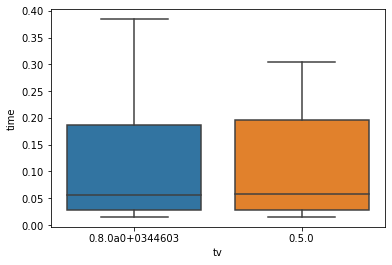

In [19]:
sns.boxplot(x="tv", y="time", data=df_ss)

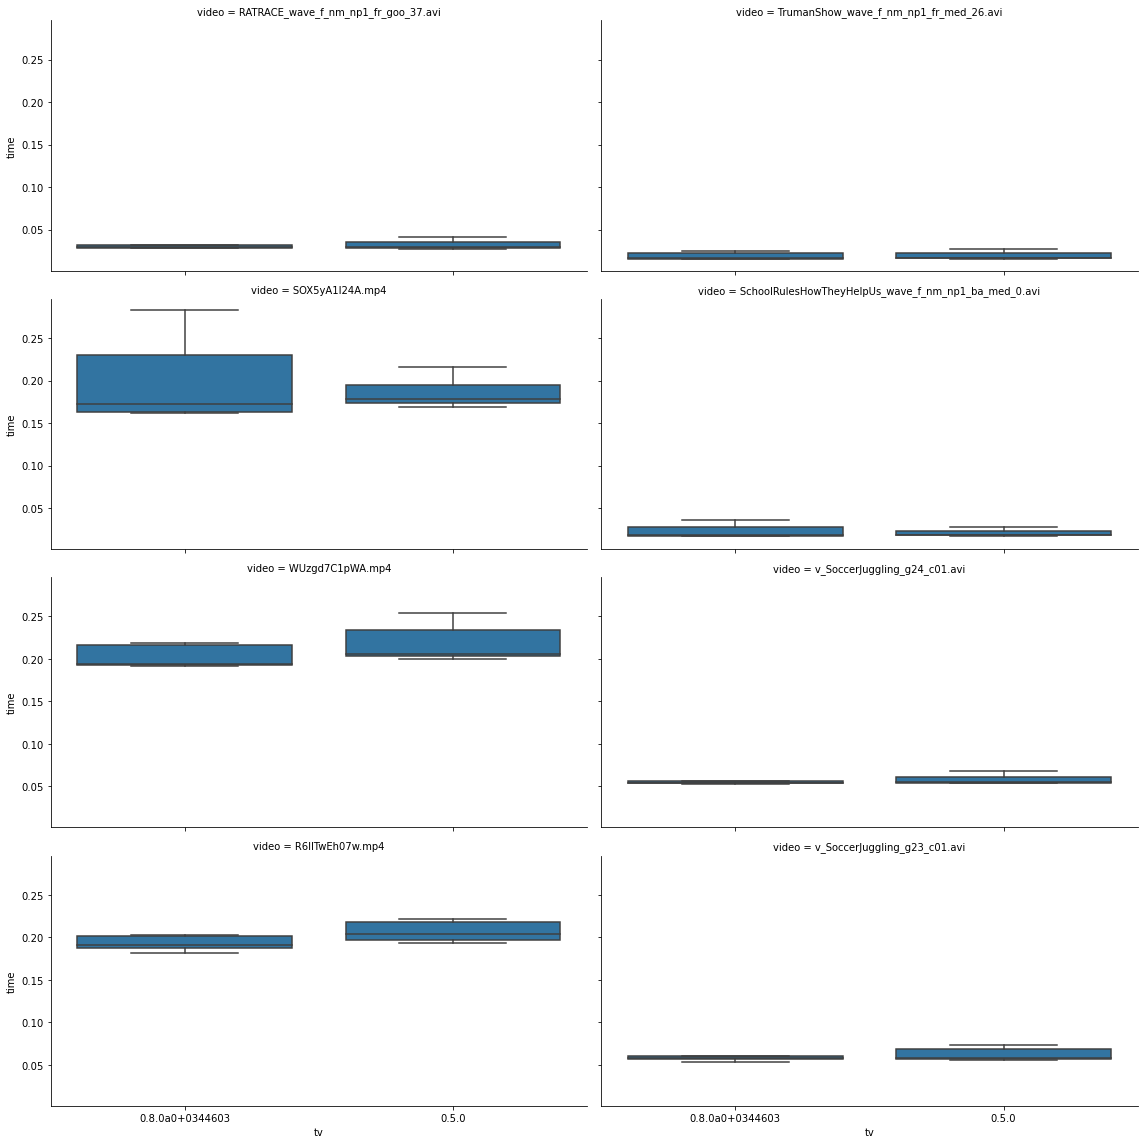

In [18]:
g = sns.FacetGrid(df_ss, col="video", col_wrap=2, height=4, aspect=2)
g = g.map(sns.boxplot, "tv", "time", showfliers = False)

In [23]:
df_ss["time_per_frame"] = df_ss['time'] / df_ss['num_frames']

/home/bjuncek/miniconda3/envs/tv08/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


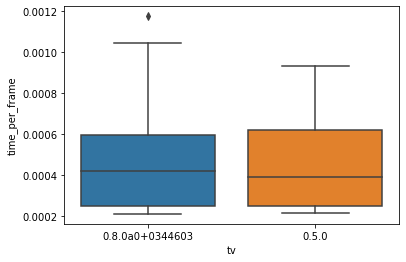

In [24]:
sns.boxplot(x="tv", y="time_per_frame", data=df_ss)

In [ ]:
g = sns.FacetGrid(df_ss, col="video", col_wrap=2, height=4, aspect=2)
g = g.map(sns.boxplot, "tv", "time", showfliers = False)

/home/bjuncek/miniconda3/envs/tv08/lib/python3.7/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
